# Pytorch Computer Vision
`torchvision` is the base for all pytorch libraries
* `torchvision.datasets` - This gets datasets and functions for computer vision problems
* `torchvision.models` - Gets pretrained computer vision models that you can you for your own problems
* `torchvision.transform` - functions for manipulating your vision data (images) to be suitable for for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for pytorch
* `torch.utils.data.DataLoader` - Creates a python iterable over a dataset

In [1]:
# Pytorch
import torch
from torch import nn

# Computer Vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor # Great for making a picture into a Tensor object (color, height, width)

# Visualization
import matplotlib.pyplot as plt

# Other files
import Images as img
import pathlib as path

In [2]:
import numpy 
print(torch.__version__)
print(torchvision.__version__)
print(numpy.version.__version__)

2.4.0+cu124
0.19.0
1.26.4


In [3]:
# device agnostic code for the reset of model
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Getting the dataset
The dataset used in this model will be from pytorch.org and use fasionmnist

In [4]:
# Setup training data
# data from torchvision.datasets
train_data = datasets.FashionMNIST(root="computer_vision/FashionMNIST", # where to download the data
                                   train=True, # want the training set?
                                   download=True, # want to download the data to your root directory?
                                   transform=ToTensor(), # how do we want to transform the data
                                   target_transform=None) # how do we want to transform the labels?
test_data = datasets.FashionMNIST(root="computer_vision/Fashion",
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None)

In [5]:
# checking the length
len(train_data), len(test_data)

(60000, 10000)

In [6]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [7]:
image, label = train_data[0] # image == colum[0], label == colum[1] (i think???)
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [8]:
# get the class names
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
# we can see that the image has a color=1, hight=28, width=28
# our table is all black and white so we see that the color channel is 1. 
image.shape, label

(torch.Size([1, 28, 28]), 9)

# visualizing data

Image shape: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

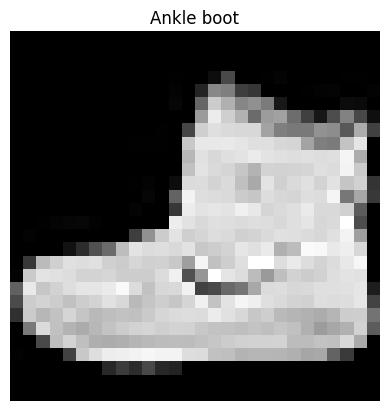

In [11]:
import matplotlib.pyplot as plt
image,label=train_data[0]
print(f"Image shape: {image.shape}")
# because matplotlib only supports two ways of input, but because this is a grayscale we can just get rid of the color channel.
# supports (row,column) and (width, height, color) color must be last
plt.imshow(image.squeeze(), cmap="gray") # cmap just changes the color
plt.title(class_names[label])
plt.axis(False) # turns axis off

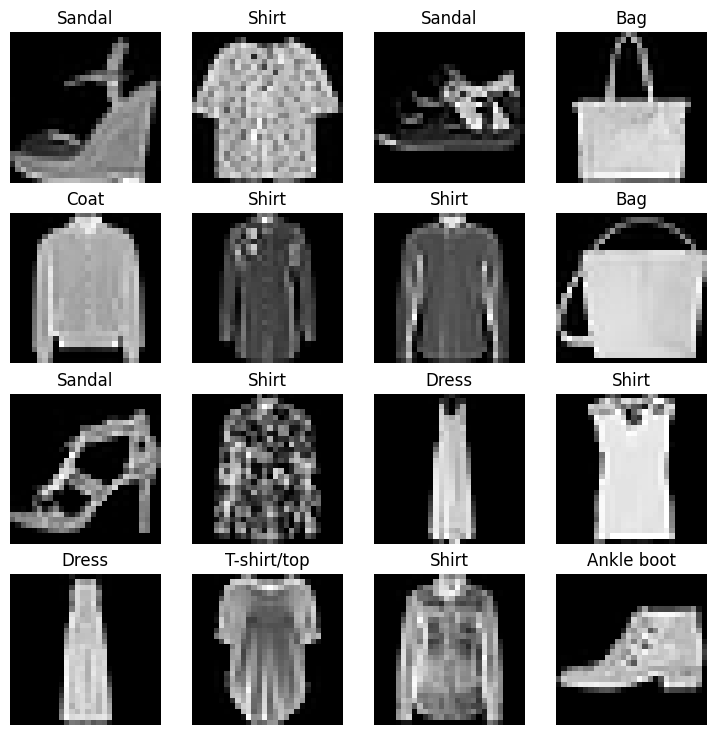

In [12]:
# plotting images
torch.manual_seed(13)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1,rows*cols+1):
    # grabs a random integer within the range of 0 to the length of train_data
    random_idx = torch.randint(0,len(train_data), size=[1]).item() # .item() grabs the values of what ever the random number is 
    # works like a tuple (key,value)

    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols,i)
    plt.imshow(image.squeeze(), cmap="gray") 
    plt.title(class_names[label])
    plt.axis(False)

# Preparing DataLoader
Right the data is in the form of pytorch datasets, but with dataloader we can turn the data into a python iterable
* turning the data into mini-batches
1. We do this because the computer may not be able to store all the data in memory
2. This also gives the neural network more chance to update its gradients per epoch. 

In [13]:
from torch.utils.data import DataLoader
# batch size is normally a factor of 8
BATCH_SIZE = 32
# Train data loader
train_dataloader = DataLoader(dataset=train_data, # The data we are working with 
                             batch_size=BATCH_SIZE, # How many to go through before the gradients update
                             shuffle=True) # to prevent overfitting (memorizing the training data) randomizes the dataset

# Test data loader
# when testing the data it is best not to shuffle the data. (This does not affect the accuracy of the model)
test_dataloader = DataLoader(dataset=test_data, 
                            batch_size=BATCH_SIZE, 
                            shuffle=False) # we want to test the model on the whole dataset\

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x23d8a9b41d0>,
 <torch.utils.data.dataloader.DataLoader at 0x23d83b887d0>)

In [14]:
# seeing whats inside the training loader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape # we can see that dataloader has added batch size (32) to the shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

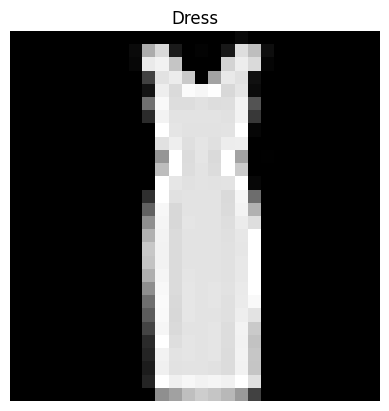

In [15]:
# sample
torch.manual_seed(13)
random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()
image, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
# figs = plt.figure(figsize=(9,9)) # how big the graph is as a whole
# rows, cols = 4,4
# for i in range(1, rows*cols+1):
#     figs.add_subplot(rows, cols,i)
#     plt.title(class_names[label])
#     plt.imshow(image.squeeze(), cmap="gray")
#     plt.axis(False)
    

In [16]:
print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"length of train data loader: {len(train_dataloader)}, batches of: {BATCH_SIZE}")
print(f"length of train data loader: {len(test_dataloader)}, batches of: {BATCH_SIZE}")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x0000023D8A9B41D0>, <torch.utils.data.dataloader.DataLoader object at 0x0000023D83B887D0>)
length of train data loader: 1875, batches of: 32
length of train data loader: 313, batches of: 32


# Building the model
best practice when building a model is to start with a baseline model.
* baseline model is a simple model that you can improve upon

In [17]:
# flatten layer
flatten_model = nn.Flatten()
# flatten take the width * height

# single sample
x = train_features_batch[0]
# flatten the model
output = flatten_model(x) # performs foward pass
# whats happening
print(f"Shape before flatting x: {x.shape}")
print(f"After flatting: {output.shape}")

Shape before flatting x: torch.Size([1, 28, 28])
After flatting: torch.Size([1, 784])


In [18]:
train_features_batch.shape

torch.Size([32, 1, 28, 28])

In [19]:
class FashionMNISTModelv1(nn.Module):
    # this is the typical 3 that the constructor takes for an input model. 
    def __init__(self,input_shape: int, hidden_shape: int, output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(nn.Flatten(),
                                        nn.Linear(in_features=input_shape, out_features=hidden_shape),
                                        nn.Linear(in_features=hidden_shape, out_features=output_shape),)
        
    def forward(self, x):
        return self.layer_stack(x)
                                         

In [20]:
torch.manual_seed(14)

# setting model with input paramenters
model_0 = FashionMNISTModelv1(input_shape=784, # 784 because Flatten() is first so the in_features has to match it. 
                              hidden_shape=10, # This is up to you. 
                              output_shape=10).to("cpu") # There are 10 different things that the image can be
model_0

FashionMNISTModelv1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

# `helper_functions.py`

In [21]:
import requests
from pathlib import Path

# download helper functions from learn pytorch repo
if Path("helper_functions.py").is_file():
    print ("Requirements already satisfied")
else:
    print("downloading helper functions")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f: # wb = writing binary, f is a common way to write to file
        f.write(requests.content) # calls all above

from helper_functions import plot_predictions, plot_decision_boundary, accuracy_fn


Requirements already satisfied


# Loss Function, Optimizer and accuracy function  

In [22]:
# loss/optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                             lr=.1)

from torchmetrics import Accuracy
acc = Accuracy(task="multiclass", num_classes=10)


# Timing
Two things you might want to track is. 
1. A Model performance (loss or accuracy)
2. How fast the model performs

In [23]:
# default timer for python
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device=None): # This is used so that we can see how fast it runs on differennt devices
    """prints differnce from star to end"""

    total_time = end-start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time
    


In [24]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')
print_train_time(start=start_time, end=end_time, device='cuda')

Train time on cpu: 0.000 seconds
Train time on cuda: 0.000 seconds


1.769996015354991e-05

# Train the model
the optimezer only updates once per batch NOT per epoch

In [25]:
# progress bar 
from tqdm import tqdm

torch.manual_seed(14)
#timer

# when first testing to see if the model works use a small epoch if the model is big
epochs = 3
mod = 1

# device
# train_data = train_data.to(device)
# test_data = test_data.to(device)

for epoch in tqdm(range(epochs)):
    # print spacing
    if epoch % mod ==0:
        print(f"Epoch:{epoch}")
    # Training 
    train_loss=0

    # Add a loop to loop through the training batches
    # X = features and y = labels
    for batch, (X,y) in enumerate(train_dataloader): # this is to keep track of the number batches we have been through
        model_0.train() # model ready to train
        # 1. forward pass
        y_pred = model_0(X)

        # 2. loss. 
        loss = loss_fn(y_pred,y)
        train_loss += loss # accumulating the train loss from ALL batches

        # 2.1 accuracy
        train_acc =acc(y_pred,y)

        # 3. zero grad
        optimizer.zero_grad()

        # 4.backpropagtion
        loss.backward()

        # 5. optimizer step
        optimizer.step()

        # if batch % 400 ==0:
        #     print(f"Looking at: {batch *len(X)}/{len(train_dataloader.dataset)} samples")
    # Dividing total train loss by length of train dataloader
    train_loss /= len(train_dataloader) # averaging the train loss 


# Testing
    test_loss, test_acc= 0,0 # since we are looping through batches we want to find the average loss
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader: # no need to keep track of where we are through the batches so no enumerating
            test_pred=model_0(X)
            test_loss+=loss_fn(test_pred,y) # += to help find the average acc/loss
            test_acc +=acc(test_pred,y)
    
    # calculating the test loss
        test_loss /= len(test_dataloader) # averaging
        test_acc /= len(test_dataloader) # averaging the test loss

    if epoch % mod==0:
        print(f"Train loss: {loss:.5f}, Train acc: %{100*train_acc:.2f} |Test loss: {test_loss:.5f}, Test acc: %{100*test_acc:.2f}")

# Train time
# time=timer()
# model_0_timer = print_train_time(start=time,
#                      end=time,
#                      device=str(next(model_0.parameters())))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0


 33%|███▎      | 1/3 [00:06<00:12,  6.32s/it]

Train loss: 0.37555, Train acc: %90.62 |Test loss: 0.60819, Test acc: %77.67
Epoch:1


 67%|██████▋   | 2/3 [00:12<00:06,  6.36s/it]

Train loss: 0.46978, Train acc: %78.12 |Test loss: 0.48843, Test acc: %83.05
Epoch:2


100%|██████████| 3/3 [00:19<00:00,  6.36s/it]

Train loss: 0.54590, Train acc: %81.25 |Test loss: 0.46785, Test acc: %83.68


In [26]:
# 2mins 10 secs for 20 epochs on cpu

In [27]:
torch.manual_seed(14)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               acc: accuracy_fn):
    """Returns a dictionary containing the results of model prediction on data_loader """
    loss,acc = 0,0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device), y.to(device)
            # Make predictions (forward pass)
            y_pred = model(X)
            # Calculate loss per batch
            loss += loss_fn(y_pred,y)
            # Calculate accuracy
            acc += accuracy_fn(y_true=y,
                                   y_pred=y_pred.argmax(dim=1))
        # scale loss and accuracy (or finding average)
        loss /= len(data_loader)
        acc /= len(data_loader)

        # only works when the module was created with a class
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc} # item turns it into a single value

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn= loss_fn,
                             acc= accuracy_fn,)
model_0_results


{'model_name': 'FashionMNISTModelv1',
 'model_loss': 0.467847615480423,
 'model_acc': 83.67611821086263}

In [28]:
# gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Improving the Model

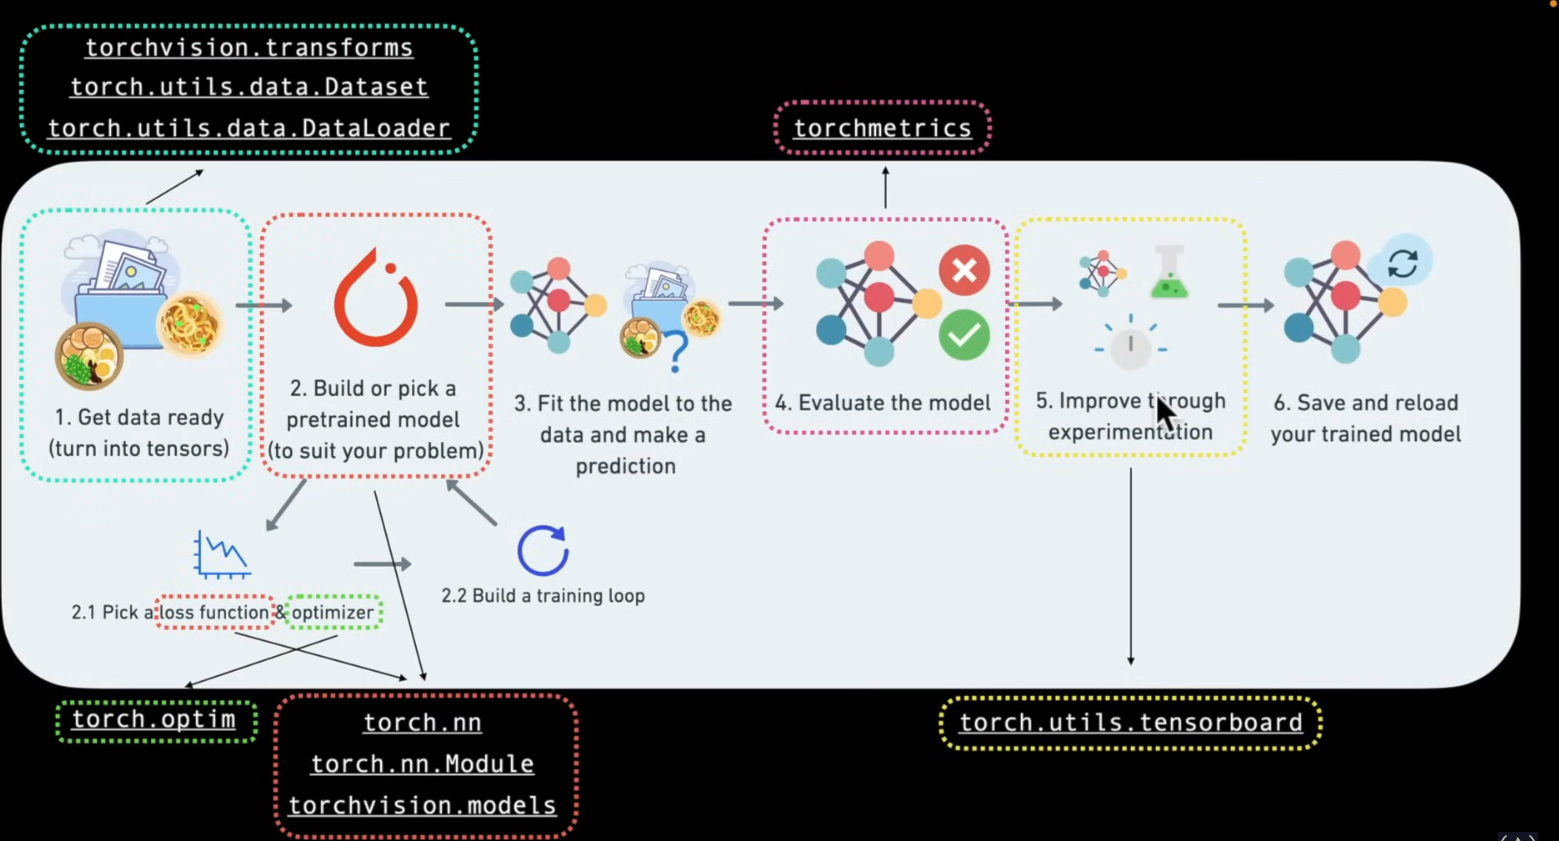

In [29]:
img.ML_process()

# Non-linear model

In [30]:
# shape check
flatten = nn.Flatten()
flat = flatten(train_features_batch)
print(f"before flatten: {train_features_batch.shape}")
print(f"flatten shape: {flat.shape}")

# number of classes
print(f"num of classes: {len(class_names)}")

before flatten: torch.Size([32, 1, 28, 28])
flatten shape: torch.Size([32, 784])
num of classes: 10


In [31]:
torch.manual_seed(14)

class FashionMNISTModelV2(nn.Module):
    def __init__(self, input: int, output: int, hidden: int):
        super().__init__()

        self.layer_stack = nn.Sequential(nn.Flatten(),
                                         nn.Linear(in_features=input, out_features=hidden),
                                         nn.ReLU(),
                                         nn.Linear(in_features=hidden, out_features=output),
                                         nn.ReLU())
        
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

torch.manual_seed(14)
model_1 = FashionMNISTModelV2(input=784, # train_features_batch.flatter() has 784 columns 
                              hidden=10, # my choice 
                              output=len(class_names)).to(device) # 10 classes 

# model on right device
next(model_1.parameters()).device

device(type='cuda', index=0)

# loss/optimizer

In [32]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                             lr=0.01)

# Train non-linear loop

In [33]:
# Train function
def train_step(model: torch.nn.Module,
          data_loader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          accuracy_fn,
          device: torch.device = device):
    """Trains the model on data_loader """
    model.train() # train mode (this is default mode)

    train_loss,train_acc = 0,0 # for averaging later

    for batch, (X,y) in enumerate(data_loader):
        # on device
        X,y=X.to(device),y.to(device) 
        
        # forward pass
        y_pred = model(X)

        # calculate loss and accuracy
        loss = loss_fn(y_pred,y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))

        # zero grad
        optimizer.zero_grad()

        # backpropagation
        loss.backward()

        # update weights
        optimizer.step()
        
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    #print(f"Train loss: {train_loss:.5f}, Train acc: %{train_acc:.2f}")

# Test function
def test_step(model: torch.nn.Module,
          data_loader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          accuracy_fn,
          device: torch.device = device):
    """Tests the model on data_loader """
    test_loss, test_acc =0,0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            # on device
            X,y=X.to(device),y.to(device)
            # forward pass
            test_pred = model(X)
            # calculate loss and accuracy
            test_loss += loss_fn(test_pred,y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=test_pred.argmax(dim=1))
        
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        #print(f"Test loss: {test_loss:.5f}, Test acc: %{test_acc:.2f}")


In [34]:
from tqdm import tqdm
torch.manual_seed(42)
epochs = 3
mod=1

for epoch in tqdm(range(epochs)):
    #print(f"Epoch: {epoch}")
    
    train_step(model=model_1,
                data_loader=train_dataloader,
                optimizer=optimizer,
                loss_fn= loss_fn,
                accuracy_fn= accuracy_fn,
                device=device)
    

    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

if epoch % mod ==0:
    print(f"Train loss: {train_loss:.5f}, Train acc: %{100*train_acc:.2f} | Test loss: {test_loss:.5f}, Test acc: %{100*test_acc:.2f}")


100%|██████████| 3/3 [00:22<00:00,  7.57s/it]

Train loss: 0.45453, Train acc: %81.25 | Test loss: 0.46785, Test acc: %83.68


In [35]:
model_1_results = eval_model(model=model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             acc= accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 1.1871612071990967,
 'model_acc': 60.90255591054313}

# Convolutional Neural Network (CNN)

In [36]:
class FashionMNISTModelV3(nn.Module):
    """Model architecture that replicates teh TinyVGG
        model from CNN explainer website"""
    
    def __init__(self, input: int, hidden: int, output: int):
        super().__init__()

        self.conv_block_1 = nn.Sequential(nn.Conv2d(in_channels=input,
                                                    out_channels=hidden,
                                                    kernel_size=3, # look at this box at a time (3x3)
                                                    stride=1, # move kernel buy 1 pixel
                                                    padding=1), # help preserve input spatial size, helps stay withing the picture (helps with performance)
                                        nn.ReLU(),
                                        nn.Conv2d(in_channels=hidden, 
                                                    out_channels=hidden,
                                                    kernel_size=3,
                                                    stride=1,
                                                    padding=1),
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size=2)) # takes the max value of the kernel size (2x2)
        
        self.conv_block_2 = nn.Sequential(nn.Conv2d(in_channels=hidden,
                                                    out_channels=hidden,
                                                    kernel_size=3,
                                                    stride=1,
                                                    padding=1),
                                        nn.ReLU(),
                                        nn.Conv2d(in_channels=hidden,
                                                  out_channels=hidden,
                                                  kernel_size=3,
                                                  stride=1,
                                                  padding=1),
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size=2))
        
        self.classifier = nn.Sequential(nn.Flatten(),
                                        nn.Linear(in_features=hidden*7*7, # have to calculate this differently
                                                  out_features=output),
                                        nn.ReLU())


    def forward(self, x: torch.Tensor):
        # x = self.conv_block_1(x)
        # print(x.shape)
        # x = self.conv_block_2(x)
        # print(x.shape)
        # x = self.classifier(x)
        # return x
        
        # same thing but better practice. 
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))
    
model_2 = FashionMNISTModelV3(input=1, # how many colors we have in out case just 1
                              hidden= 10,  # your choice
                              output=len(class_names)).to(device) # how many classes we have


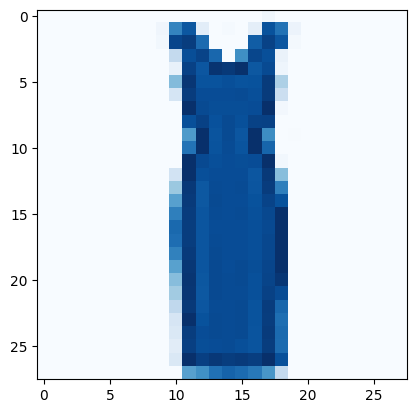

In [37]:
plt.imshow(image.squeeze(), cmap="Blues")

In [38]:
random_tensor = torch.randn(size=(1,28,28)).to(device)
model_2(random_tensor.unsqueeze(dim=0))

# since max pool kernal is 2 we divide the ends by 2

tensor([[0.0000, 0.0000, 0.0000, 0.0051, 0.0772, 0.0065, 0.0000, 0.0744, 0.0000,
         0.0000]], device='cuda:0', grad_fn=<ReluBackward0>)

# Stepping Through `nn.Conv2d()` 

In [39]:
torch.manual_seed(14)

# images 
images = torch.randn(size=(32,3, 64,64))
test_image = images[0]

print(f" image batch shape: {images.shape}")
print(f" single image shape: {test_image.shape}")
# print(f"test image shape: \n {test_image}")

 image batch shape: torch.Size([32, 3, 64, 64])
 single image shape: torch.Size([3, 64, 64])


In [40]:
conv_layer = nn.Conv2d(in_channels=3, # the same number as the colors 
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

# error "expected x dimensional but got y dimensional can be fixed by squeeze() or unsqueeze()"
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

# `MaxPool2d`
When going through `MaxPool2d` layer the shape is divided by what ever the kernel size is. 

In [41]:
# sample `nn.MaxPool2d` layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

print(f"orginal shape: {test_image.shape}")

# passing image through
test_image_through_conv = conv_layer(test_image)
print(f"shape after conv layer: {test_image_through_conv.shape}")

# pass data throug the mx pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"shape after conv_layer and max_pool_layer: {test_image_through_conv_and_max_pool.shape}")

orginal shape: torch.Size([3, 64, 64])
shape after conv layer: torch.Size([10, 64, 64])
shape after conv_layer and max_pool_layer: torch.Size([10, 32, 32])


In [42]:
torch.manual_seed(14)
random_tensor = torch.randn(size=(1,1,2,2))
print(f"random tensor")

max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_tensor = max_pool_layer(random_tensor)

print(f"Max pool tensor: {max_pool_tensor}")
print(f" tensor shape {max_pool_tensor.shape}")
random_tensor

random tensor
Max pool tensor: tensor([[[[-0.3720]]]])
 tensor shape torch.Size([1, 1, 1, 1])


tensor([[[[-1.0141, -0.3720],
          [-0.7516, -0.8623]]]])

# Loss/Optimizer

In [43]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=.1)

# Train/Test For Conv2d

In [44]:
def training_conv2d(model: torch.nn.Module,
                dataloader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                acc: accuracy_fn,
                device: torch.device = device) -> str:
    """ train step for class model with maxpool and conv2d"""

    total_loss, total_acc = 0,0
    for batch, (X,y) in enumerate(dataloader):
        X,y = X.to(device), y.to(device)
        # forward pass
        y_pred = model(X)

        # loss
        loss = loss_fn(y_pred,y)
        total_loss += loss 
        acc = accuracy_fn(y_true=y,
                          y_pred=y_pred.argmax(dim=1))
        total_acc += acc 

        # zero grad
        optimizer.zero_grad()

        # back
        loss.backward()

        # optim
        optimizer.step()
    total_loss /= len(dataloader)
    total_acc /= len(dataloader)
    
    print(f"Train loss: {total_loss:.5f}, Tran Acc: {total_acc:.2f}")

def testing_conv2d(model: torch.nn.Module,
                   dataloader: torch.utils.data.DataLoader,
                   loss_fn: torch.nn.Module,
                   acc: accuracy_fn,
                   device: torch.device = device) -> str:
    """ Testing step for conv2d"""

    model.eval()
    test_loss, test_acc = 0,0
    with torch.inference_mode():
        for (X,y) in dataloader:
            X,y= X.to(device), y.to(device)
            model.to(device)
            test_pred = model(X)
            loss = loss_fn(test_pred, y)
            test_loss += loss
            acc = accuracy_fn(y_true=y, 
                              y_pred=test_pred.argmax(dim=1))
            test_acc += acc
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
    print(f"Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}")

# Training loop

In [45]:
torch.manual_seed(14)
torch.cuda.manual_seed(14)

epochs = 3 

for epoch in tqdm(range(epochs)):
    #print(f"Epoch:{epoch}")

    training_conv2d(model = model_2,
                    dataloader= train_dataloader,
                    loss_fn=loss_fn,
                    optimizer=optimizer,
                    acc= accuracy_fn,
                    device=device)
    
    testing_conv2d(model = model_2,
                   dataloader=test_dataloader,
                   loss_fn= loss_fn,
                   acc= accuracy_fn,
                   device= device)

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 1.14657, Tran Acc: 59.35


 33%|███▎      | 1/3 [00:09<00:19,  9.55s/it]

Test loss: 0.78804, Test Acc: 74.16
Train loss: 0.46188, Tran Acc: 83.98


 67%|██████▋   | 2/3 [00:19<00:09,  9.52s/it]

Test loss: 0.36319, Test Acc: 86.66
Train loss: 0.32447, Tran Acc: 88.28


100%|██████████| 3/3 [00:28<00:00,  9.48s/it]

Test loss: 0.33319, Test Acc: 87.92


In [46]:
model_2_results = eval_model(model= model_2,
                             data_loader = test_dataloader,
                             loss_fn=loss_fn,
                             acc=accuracy_fn)
model_2_results

{'model_name': 'FashionMNISTModelV3',
 'model_loss': 0.33318954706192017,
 'model_acc': 87.91932907348243}

# Comparing Results

In [49]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                  model_1_results,
                  model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelv1,0.467848,83.676118
1,FashionMNISTModelV2,1.187161,60.902556
2,FashionMNISTModelV3,0.333190,87.919329


Text(0, 0.5, 'model')

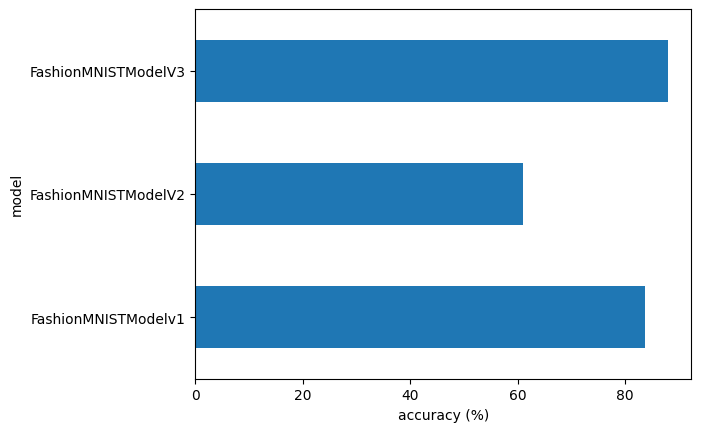

In [52]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh") # kind="bar" will get a vertical chart
plt.xlabel("accuracy (%)")
plt.ylabel("model")

# Evaluate Random Predictions

In [55]:
def predictions(model: torch.nn.Module,
                data: list,
                device: torch.device = device):
    
    pred_probs = [] 
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample and add a batch dimension
            sample = torch.unsqueeze(sample,dim=0).to(device)

            # forward pass
            pred_logit = model(sample)

            # get the probabilities (logits -> probabilities)
            # since we are using a multi class dimension problem we need to use torch.softmax 
            # iff non-multi class use torch.sigmoid (This means binary classification.)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # matplotlib does not like gpu
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [58]:
images, labels = test_data[0][:10]
images.shape, labels

(torch.Size([1, 28, 28]), 9)

In [115]:
import random
seed = random.randint(0,100)
random.seed(seed)

test_samples= []
test_labels = []

for sample, label in random.sample(list(test_data),k=9): # k can be what every you want but note that later it can be helpful to choose a number that can be sqrt()
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'T-shirt/top')

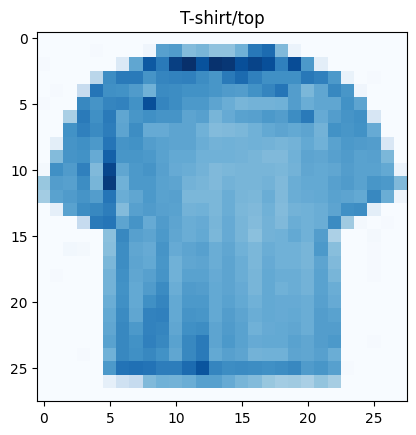

In [116]:
plt.imshow(test_samples[0].squeeze(), cmap="Blues")
plt.title(class_names[test_labels[0]])

In [117]:
# Predictions

pred_probs = predictions(model=model_2,
                        data=test_samples)

# View first 2 predictions probabilities
pred_probs[:2]

tensor([[5.2797e-01, 5.7382e-04, 9.3069e-02, 4.5201e-03, 7.4120e-03, 5.7382e-04,
         3.5271e-01, 5.7382e-04, 1.2018e-02, 5.7382e-04],
        [5.8838e-06, 5.8838e-06, 5.8838e-06, 8.2677e-06, 2.3404e-05, 2.2751e-03,
         1.3512e-05, 9.9074e-01, 5.6266e-03, 1.2965e-03]])

In [118]:
# Converting predictions probabilities to labels
pred_classes = pred_probs.argmax(dim=1) # takes the make of the matrix above 
pred_classes, test_labels
# we get 9 samples since we set k=9 earlier

(tensor([0, 7, 2, 8, 7, 5, 5, 7, 8]), [0, 7, 2, 8, 7, 5, 5, 8, 8])

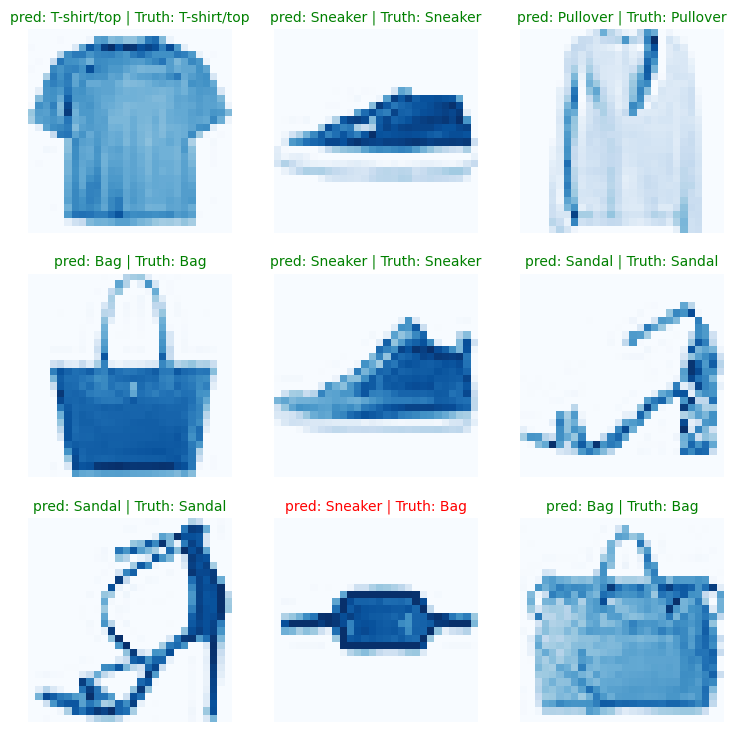

In [119]:
plt.figure(figsize=(9,9),)
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):

    # Create subplot
    plt.subplot(nrows,ncols, i+1) # each subplot will be (rows,cols, index) index cant start at 0

    # plot the target img
    plt.imshow(sample.squeeze(), cmap="Blues") # squeeze to get rid of the batch size

    # predictions label
    pred_label = class_names[pred_classes[i]]
    # True labels
    truth = class_names[test_labels[i]]

    # Adding lables
    text = f"pred: {pred_label} | Truth: {truth}"
    if pred_label == truth:
        plt.title(text, fontsize=10, c="g" )
    else:
        plt.title(text, fontsize=10, c="r")
    
    # turn off axis
    plt.axis(False)

In [120]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']